### Question 2: Apply Ridge Regression to the Dataset 

Let us now try a more restrained regression model. Apply Ridge Regression, using only the first 500 rows for training.



# Result

- Create a function ridge_reg(path), where path is the location of the csv file
- This function should load the file, train the model, and then test the model
- The function should return a 3-tuple, (coefficient array, intercept, R^2 of model when run on last 500 rows)
- E.g. ([12 ,   98], 10, 0.8)

## Initialization

In [1]:
# data management

import pandas as pd
import numpy as np

# ML prediction

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# metrics

from sklearn.metrics import accuracy_score

# visualization

import seaborn as sns
sns.set_theme(style="darkgrid")

# set path

path = 'HKUST_FinTech_Income_Dataset.csv'

In [2]:
# read table

df = pd.read_csv(path, index_col=0)

## Data Descriptive Statistics

In [3]:
df.describe()

,Experience,Age,Income
count,1000.000000,1000.000000,1000.000000
mean,4.508000,25.968000,61545.552000
std,2.854134,3.111375,37173.633425
min,0.000000,20.000000,697.000000
25%,2.000000,23.000000,28590.250000
50%,5.000000,26.000000,65876.500000
75%,7.000000,28.000000,93883.250000
max,9.000000,32.000000,122462.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
Experience    1000 non-null int64
Age           1000 non-null int64
Income        1000 non-null int64
dtypes: int64(3)
memory usage: 31.2 KB


## Data Visualization

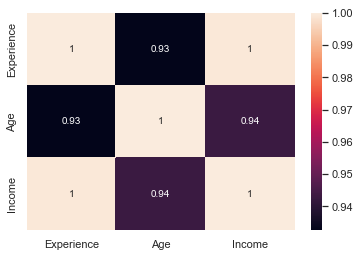

In [5]:
# correlation

sns.heatmap(df.corr(),annot=True)

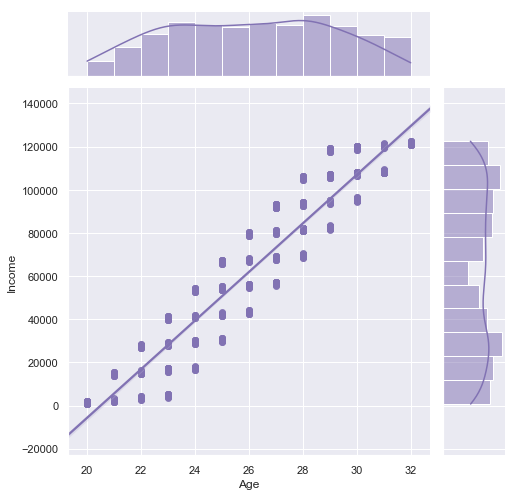

In [6]:
# simple linear regression visualized (Age)

sns.jointplot(x="Age", y="Income", data=df,kind="reg", truncate=False,color="m", height=7)

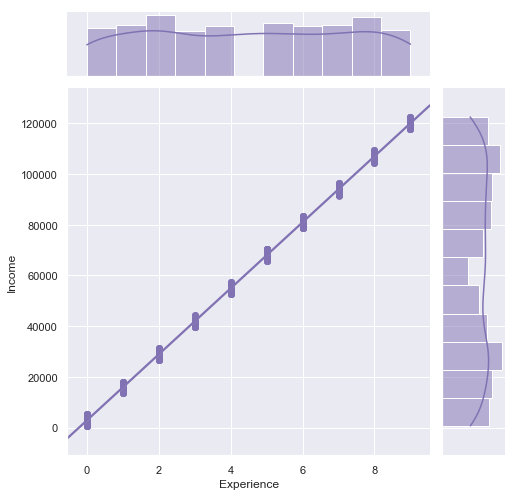

In [7]:
# simple linear regression visualized (Experience)

sns.jointplot(x="Experience", y="Income", data=df,kind="reg", truncate=False,color="m", height=7)

Based on the data visualization, we expect the ridge regression model to have a positive relationship (coefficent) for Age and Experience with Income.

Note that the visualization shows that if you are under the age 20, then the Income would be negative. This interpretation implies that if you under the age 20, you are in debt.

## Model Tuning

### Train / Test Split

In [8]:
train = df.iloc[0:500]
test = df.iloc[500:]

### Cross Validation

In [9]:
# initiate cross validation grid

ridge_params = np.arange(0, 1, 0.1).tolist()
max_iter_params = np.arange(500, 2000, 200).tolist()
solver_params = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

try_grid = [{'solver':solver_params,
             'max_iter': max_iter_params,
             'alpha': ridge_params,
           }]

In [10]:
# cross validation (k-fold=10)

regr = GridSearchCV(Ridge(), param_grid=try_grid, cv=10)
regr.fit(train[['Experience','Age']],train['Income'])
regr.best_params_

{'alpha': 0.9, 'max_iter': 1700, 'solver': 'saga'}

## Preliminary Model

In [11]:
def ridge_reg(path):
    df = pd.read_csv(path)
    train = df.iloc[0:500]
    test = df.iloc[500:]
    reg = Ridge().fit(train[['Experience','Age']], train['Income'])
    return (reg.coef_, reg.intercept_, reg.score(test[['Experience','Age']], test['Income']))

## Final Model

In [15]:
def ridge_reg_final(path):
    df = pd.read_csv(path)
    train = df.iloc[0:500]
    test = df.iloc[500:]
    reg = Ridge(alpha=0.9,max_iter=1700,solver='saga').fit(train[['Experience','Age']], train['Income'])
    return (reg.coef_, reg.intercept_, reg.score(test[['Experience','Age']], test['Income']))

## Model Comparison

In [16]:
# preliminary model performance

ridge_reg(path)

(array([11998.47581673,   999.25873138]),
 -18502.44480048775,
 0.9997500751304992)

In [17]:
# final model preformance

ridge_reg_final(path)

(array([12000.7538428 ,  1001.79700101]),
 -18578.674008684713,
 0.9997500916072706)

## Interpretation

Preliminary Model and Final Model seems to perform more or less the same; however, the final model with the tuned hyperparamters will be selected.

The coefficient for Experience is 12,001 and for Age is 1,002. This means that when Experience and Age increases by 1 unit, Income will increase by 12,001 and 1,002, respectively.

The intercept is -18,579, which seems misleading; but this is mainly due to having negative Income when Age is less than 20. A polynomial fit would be better than linear in modeling the data.

The correlation coefficient is 0.9997, which is almost a perfect positive linear relationship. I believe that this model is overfitted and will have be tuned to account for that. Though this model performed slightly worst than the Linear Regression model, their differences are neglible. Even with the tuned hyperparameters, the performance is the same. A linear fit on the data may not be suitable and other regressions can be considered for this data set.